# Python Exam (Master, 13/10/2020): Ising Model

> + **Allocated time:** 2h
> + **Send your final notebook** at the end of the exam at [romain.madar@cern.ch](mailto:romain.madar@cern.ch)
> + **Allowed documents:** documentation of [python](https://docs.python.org/3/), [numpy](https://numpy.org/devdocs/user/index.html), [matplotlib](https://matplotlib.org/contents.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/) and [scipy](https://docs.scipy.org/doc/scipy/reference/) as well as the documentation from the notebook interface using `Shift+tab` keyboard shortcut, `help(module)` or `help(function)`.
> 
> The final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account mainly the correctness of the answers, but also the clarity of the explanations and the quality of the code. *There is no required knowledge about Ising model to answer the questions asked in this exam.*

## General informations

### A bit of context ...

The Ising model is famous piece of statistical physics, which is originally meant to describe magnetic material made of interacting magnetic dipole moments at given temperature. This problem is *a priori* extremely complex and the Ising model offers a simplified approach to model macroscopic magnetic phenomena, in particular phase transition. In practice, this model describes a system of coupled discrete system, such as spin 1/2, forming a n-dimensional lattice. Interactions are assumed to take place only between closest neighbours, accouting for the short-range nature of magnetic interactions.

This exam proposes to implement a simulation of such a system and explore some its dynamical properties. In a first part, a 1 dimension lattice is considered (*i.e.* spins are disposed on a line) and the Metropolis algorithm will be implemented for the thermal evolution. In a second part, a 2 dimension lattice will be investigated using a provided python package.

### Import packages and plot cosmetics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## 1. Ising model in one dimension

**1.1.** We want to numerically create a system of N spins in one dimension (spatial positions are determined by one coordinate). Spin can be 'up', *i.e.* with a value $+1$ or 'down', *i.e.* with a value $-1$. Using the numpy function `np.random.randint()`, creates a numpy array corresponding to `N=100` spins in a random state. Create a function `initState(N)` which return a spin system of N spins and print the result.

In [3]:
def initState(N):
    return 2*np.random.randint(2, size=N) - 1

spins = initState(100)
print(spins)

[-1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1
 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1
  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1
  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1
  1 -1 -1 -1]


**1.2** Write a function `magnet(s)` which compute the total normalized magnetization of the system `s`, defined as 
$$
M = \frac{1}{N} \sum_{i} s_i
$$

In [4]:
def magnet(s):
    return s.mean()

print(magnet(spins))

0.2


**1.3** Using an explicit `for` loop, create 10000 times a new spin system, compute $M$ for each of them, and plot and histogram of 1000 $M$, using a 100 bins between -1 and 1. Repeat this for N=10, 100, 1000. We will keep N=100 after this question, unless specifed otherwise.

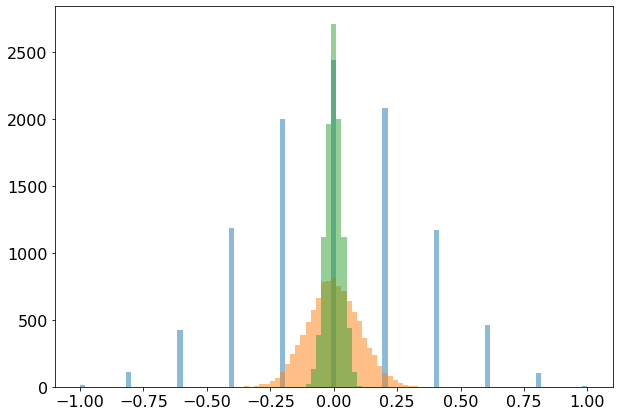

In [5]:
m1, m2, m3 = [], [], []
for i in range(10000):
    
    # Create 3 spin system with different size
    s1 = 2*np.random.randint(2, size=10) - 1
    s2 = 2*np.random.randint(2, size=100) - 1
    s3 = 2*np.random.randint(2, size=1000) - 1
    
    m1.append(s1.mean())
    m2.append(s2.mean())
    m3.append(s3.mean())
    
for m in [m1, m2, m3]:
    plt.hist(m, bins=np.linspace(-1, 1, 100), alpha=0.5)

**1.4 a)** We consider now a case of N=100 spins. The goal of this question is to compute the energy of the system. Close-by aligned spins leads to a lower energy, while anti-aligned close-by spins has a energy cost. At the end, we can define the normalized energy of the system as:
$$
E = -\frac{1}{2} \frac{1}{N}\sum^{N-1}_{i=1} ( s_{i}s_{i-1} + s_{i}s_{i+1})
$$

Write a function `energy(s)` returning the total energy of the system `s`. Since the first (last) spin has not left (right) neighbour, we will simply exclude them from sum in the energy calculation (but we keep them in the normalization factor $N$).

**HINT:** the correct approach doens't use explicit for loop. Once can start by defining a 'bulk' spin system, exluding the first and the last element. In a next step, one can try to get all left neighbours in one array and all the right ones in another array.

In [6]:
def energy(s):
    sBulk  = s[1:-1]
    sLeft  = s[2:]
    sRight = s[:-2]
    return - 0.5 * np.mean(sBulk*sLeft + sBulk*sRight)

**1.4 b)** Which value of magnetization and energy do you expect for a system with all spin up? Check the result explicitely by generating a state with all spins at 1 and calucating energy and magnetization.

In [7]:
aligned = np.zeros(100) + 1
print('Energy:', energy(aligned))
print('Magnet:', aligned.mean())

Energy: -1.0
Magnet: 1.0


**1.4 c)** Repeat the question for a system of spins where they are all anti-aligned (*i.e*, one up, one down, one up, etc ...).

**HINT:** It can be useful to remember how to select every two elements in an array.

In [8]:
anti = np.zeros(100) + 1
anti[::2] = -1
print('Energy:', energy(anti))
print('Magnet:', anti.mean())

Energy: 1.0
Magnet: 0.0


**1.5** The goal of this question is to implement a thermal evolution of the spin system, by doing the following steps:
  1. flip randomely $n$ spins
  2. compute the energy difference $\Delta E$ due to the flipping
  3. accept the new configuration with a probability 1.0 if $\Delta E<0$, and with a probability $e^{\frac{-\Delta E} {T}}$ if $\Delta E>0$, where $T$ is a new parameter of the simulation, called temperature. If the new configuration is not accecped, the lattice state is unchanged but the procedure still count as one thermal evolution.

**1.5 a)** Write a function `thermalEvolution(spins, T, n)` which operate these three steps on a system `spins` and return the evolved lattice state.

   + **HINT1:** flipping a spin can be seen by a multiplication by $-1$.
   + **HINT2:** to generate $n$ random integers, between $0$ and $N$, one can use `np.random.randint(low=0, high=N, size=n)` command.
   + **HINT3:** an acceptation rate following $e^{\frac{-\Delta E} {T}}$ can be obtained by accepting if $r<e^{\frac{-\Delta E} {T}}$, where $r$ is a random number between $0$ and $1$ (which can be obtained with the function `np.random.rand()`.

In [9]:
def thermalEvolution(spins, T, n):
    
    # 1. Flip n spins,
    idx  = np.random.randint(low=0, high=100, size=n)
    flip = np.zeros(spins.shape) + 1
    flip[idx] = -1
    
    # 2. Compute the energy difference
    dE = energy(spins*flip) - energy(spins)
    
    # 3. Compute decision based on energy cost or thermal fluctuation
    fluc = np.random.rand() < np.exp(-dE/T)
    update = (dE<0) | (fluc) 
    
    # 4. Return either the new state or the unchanged state
    if update :
        return spins*flip
    else:        
        return spins

**1.5 b)** Plot the total magnetization as function of time for 5000 thermal evolutions (we will use an explicit `for` loop), where for each thermal evolution, 30 spins are flipped. Compare the evolution of the magnetization with time for three temperature values, 0.02, 0.03 and 0.1 (the spin system has to be initialized for each temperature before starting the "thermalization").

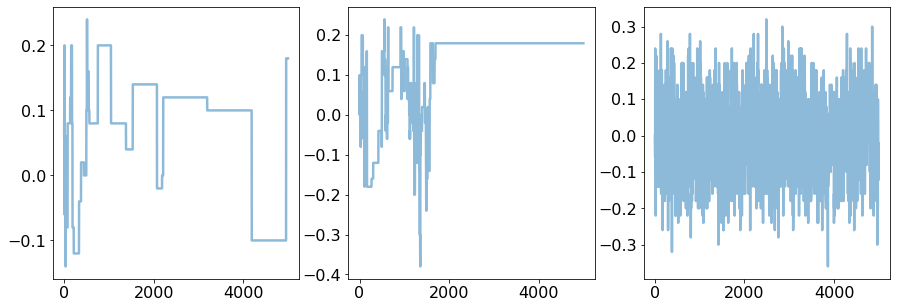

In [10]:
plt.figure(figsize=(15, 5))
for i, T in enumerate([0.02, 0.03, 0.1]):
    m = []
    s = initState(100)
    for _ in range(5000):
        s = thermalEvolution(s, T=T, n=30)
        m.append(magnet(s))
    plt.subplot(1, 3, i+1)
    plt.plot(m, alpha=0.5)

## 2. Ising model in two dimensions

Since the 2D simulation is a bit more tricky, a python package is provided for the exam. The main object of this package is a spin lattice, which can be created and vizualized as follow:

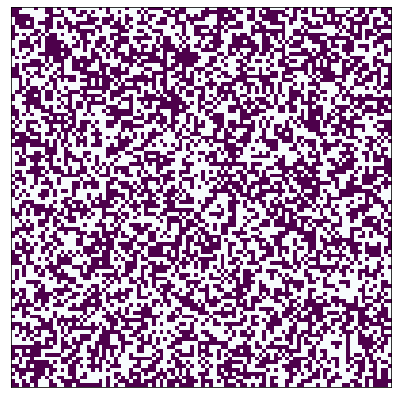

In [11]:
import ising
lat = ising.spinLattice(100)
lat.plot()

Here is a quick description of the main functions availaible in the the `ising` package, which can be called on a `spinLattice` object:

 + `lat.spins` is directly the 2D numpy array of spin values
 + `lat.plot()` plots the current state of the lattice
 + `lat.energy()` computes and returns the total (normalized) energy of the lattice
 + `lat.magnetization()` computes and returns the total (normalized) magnetization of the lattice 
 + `lat.randomize()` randomizes the state of the lattice (*i.e.* randomely flip all spins)
 + `lat.align()` aligns all spin of the lattice at +1
 + `lat.antialign()` anti-aligns all spins of the lattice
 + `lat.thermalEvolution(T)` performs one single thermal evolution under the temperature T

**2.1** Using an explicit `for` loop, vizualize the state of a $100\times 100$ spins lattice after 0, 100 and 1000 thermal evolution steps, for a temperature of 0.5. One can use the instruction `spins.thermalEvolution(T)` to perform one single thermal evolution at a temperature T. Compare the result of the two following situations:
 + the lattice is randomized before thermal evolutions
 + the lattice is aligned before thermal evolutions

In [12]:
def plotEvolution(T, mode='rand'):
    
    plt.figure(figsize=(15, 8))
    
    if mode=='rand':
        lat.randomize()
    if mode=='align':
        lat.align()
    if mode=='anti':
        lat.antialign()
    
    for i in range(1001):

        if i==0:
            plt.subplot(1, 3, 1)
            lat.plot()

        if i==100:
            plt.subplot(1, 3, 2)
            lat.plot()

        if i==1000:
            plt.subplot(1, 3, 3)
            lat.plot()
            
        lat.thermalEvolution(T)

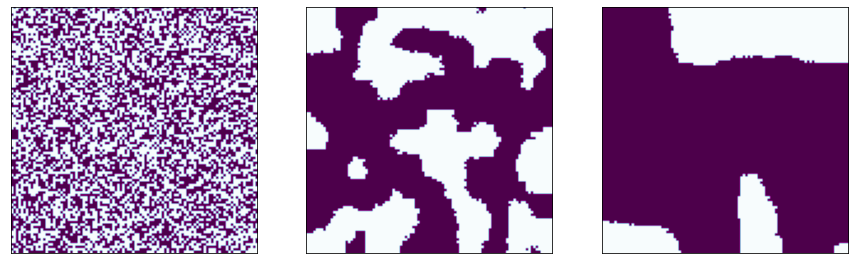

In [13]:
plotEvolution(0.5, 'rand')

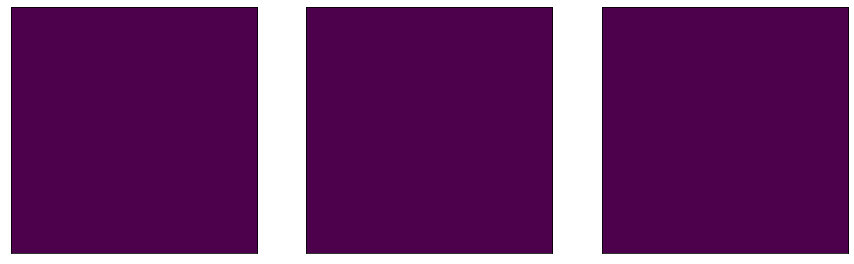

In [14]:
plotEvolution(0.5, 'align')

**2.2 a.** Write a function `plotEvolution(T, mode)` which produce the three plots before for a give temperature `T` and a given initialization mode (*i.e.* randomized or aligned). 

**2.2 b.** Compare the evolution of the lattice, when it is aligned at first, for four temperatures, namely 1.0, 1.5, 2.0 and 2.5. What do you notice?

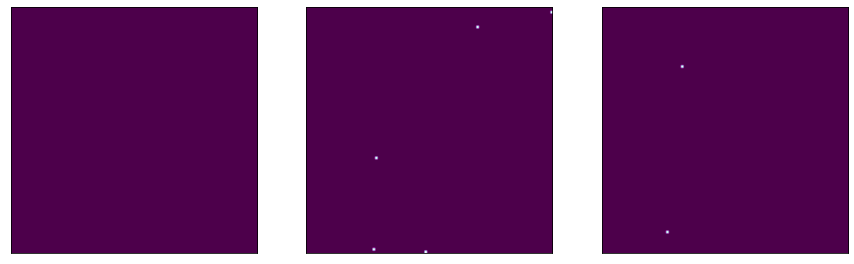

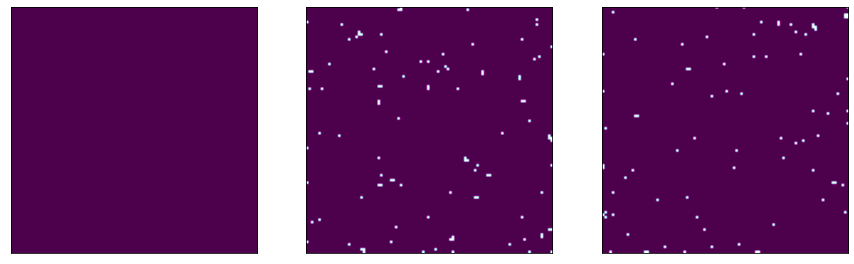

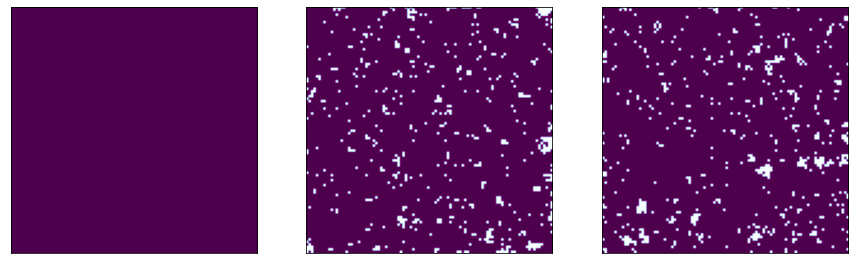

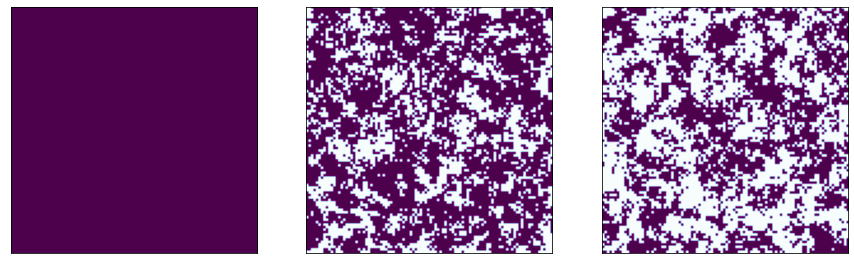

In [15]:
for T in [1.0, 1.5, 2, 2.5]:
    plotEvolution(T, 'align')

**2.3** The goal of this question is to investigate the behaviour of the magnetization with the temperature. 

**2.3 a)** Write a function `magThermalEq(lattice, T)` which aligns the lattice `lattice`, performs 1000 thermal evolution at a temperature `T` and return the final magnetization at thermal equilibrium.

In [16]:
def magThermalEq(lattice, T):
    lattice.align()
    for i in range(1000):
        lattice.thermalEvolution(T)
    return lattice.magnetization()

**2.3 b)** Plot the magnetization after thermalization, as a function of the temperature. One would consider 30 points between 1.5 and 3.0, and an explicit `for` loop over temperatures is allowed.

In [17]:
lat = ising.spinLattice(100)
Ts = np.linspace(1.5, 3.0, 30)
Ms = [magThermalEq(lat, T) for T in Ts]

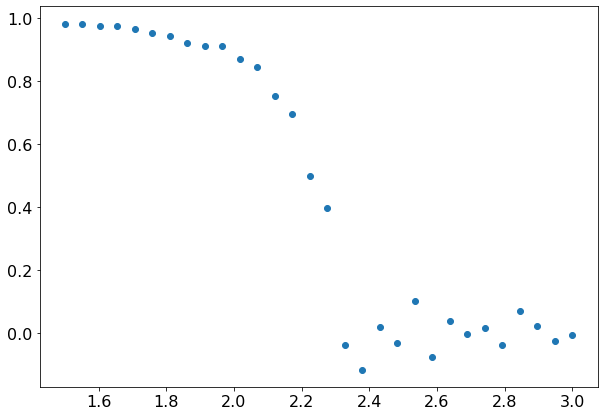

In [18]:
plt.plot(Ts, Ms, 'o');

**2.3 c)** Does this behaviour depends on the lattice size? One could try a couple of smaller sizes.

In [19]:
def plotMag(N):
    lat = ising.spinLattice(N)
    Ts = np.linspace(1.5, 3.0, 30)
    Ms = [magThermalEq(lat, T) for T in Ts]
    plt.plot(Ts, Ms, 'o');

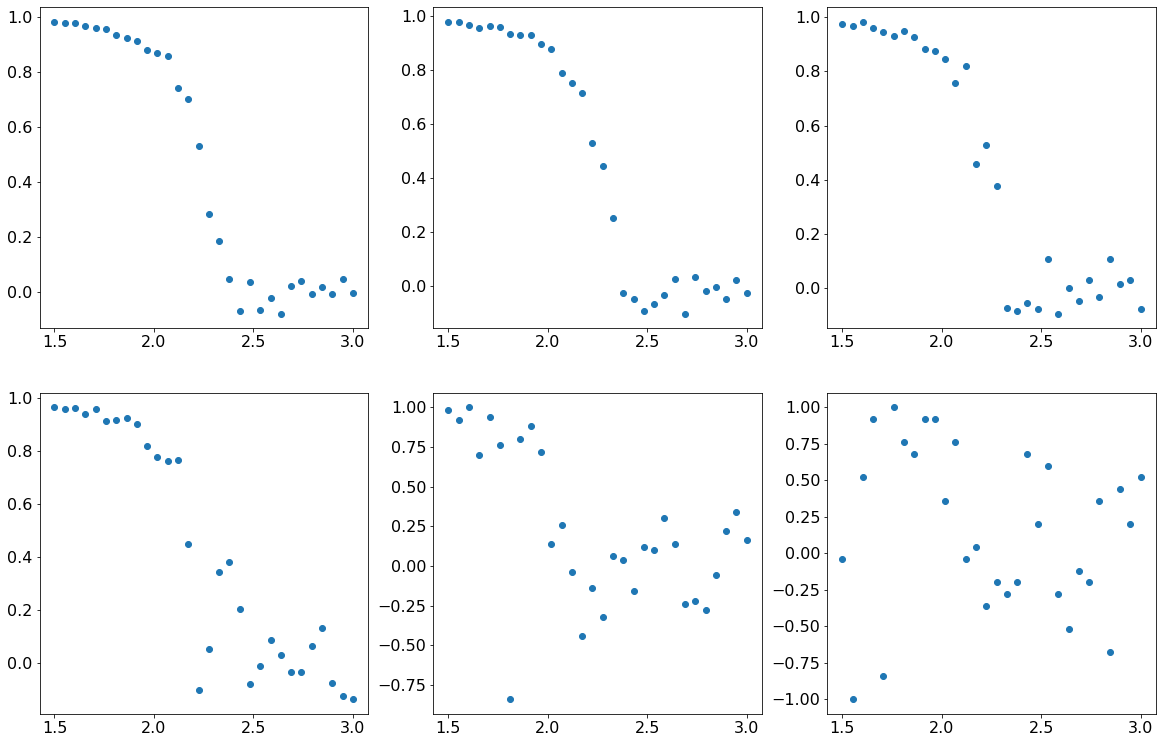

In [20]:
plt.figure(figsize=(20, 13))
for i, n in enumerate([100, 80, 50, 30, 10, 5]):
    plt.subplot(2, 3, i+1)
    plotMag(n)

**BONUS QUESTION** 

The goal of this question is to use some already-simulated data to investigate the correlation distance between pair of spins in the lattice. This can be done measuring the correlation between pairs of spins as function of the distance separing the two spins. It's not needed to fully understand this concept to answer the following question. At the end, all you need to know is that you have a function of r for different temperatures: $\mathcal{C}_T(r)$.

In order to make the use of these data easier, a dataframe `df` containing values of $r$ and correlations for several temperatures is loaded below. This dataset corresponds to a $30 \times 30$ spin lattice. Also, the column name of correlations values for each temperature is given via a dictionnary `corrTs`. An example of how to access the information is given below.

In [21]:
# Simulated temperatures 
Ts = [0.5, 1., 1.5, 1.75, 2, 2.1, 2.15, 2.175, 2.2, 2.225, 2.25, 2.269, 2.30, 2.35, 2.40, 2.5, 2.6, 2.8, 3, 3.5, 4]

# Column name of the correlations data for each temperatures
corrTs = {T: 'MeanT'+str(T) for T in Ts}

# Full data frame
df = pd.read_csv('TwoPointCorr_30x30.csv')

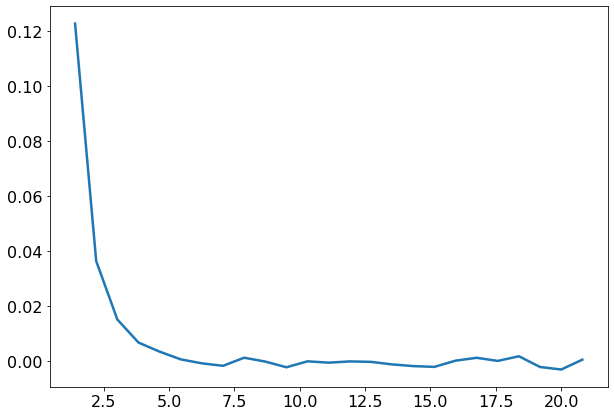

In [22]:
# Get radius data
r = df['r']

# Get correlations for T=4
c = df[corrTs[4]]

# PLot the correlation vs the radius
plt.plot(r, c);

Using the function `optimize.curve_fit()` from `scipy` module, fit the correlation verus the radius for each temperature, by a decreasing exponential function:
$$
f(r) = A \; e^{-\frac{r-r_0}{\xi}}
$$
where $A$, $r_0$ and $\xi$ are parameters to be fitted. 

**HINT:** When using `optimize.curve_fit()` function, it can be useful to give initial value of free parameters (argument `p0`), and also to restrict the parameters ranges during the minimization (argument `bounds`). 

Plot $\xi$ vesus $T$.

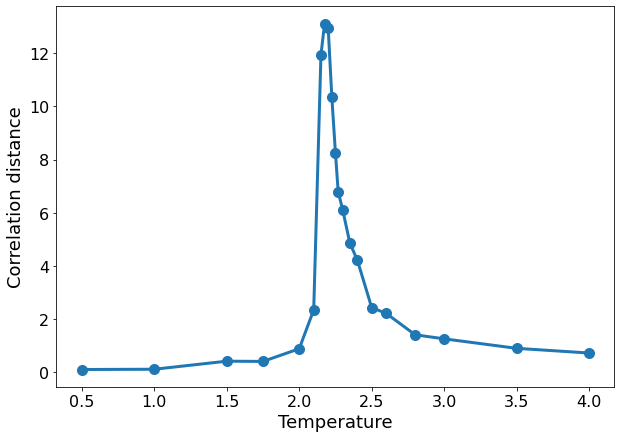

In [23]:
from scipy import optimize

# Define the fit function
def expModel(r, A, r0, xi):
    return A * np.exp( -(r-r0)/xi )

# Loop over temperatures
corrDist = []
for T in Ts:
    r, C = df['r'], df[corrTs[T]]
    p, cov = optimize.curve_fit(expModel, r, C, p0=[0.25, 1, 0.2], bounds=([0.0, 0.5, 0.0], [1, 2, 20]))
    corrDist.append(p[2])

plt.plot(Ts, corrDist, markersize=10, marker='o', linewidth=3)
plt.ylabel('Correlation distance')
plt.xlabel('Temperature');